<a href="https://colab.research.google.com/github/dikiydinozavrik/Flight-Satisfaction/blob/main/EDA_clients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Клиенты авиакомпании

Датасет содержит информацию о клиентах некоторой авиакомпании

## Импорт библиотек, константы

In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [55]:
RANDOM_STATE = 42

In [56]:
DATASET_PATH = "https://raw.githubusercontent.com/dikiydinozavrik/Flight-Satisfaction/main/EDA/clients.csv"

## Загрузка и обзор данных

### Загрузка

In [57]:
# загрузка данных
df = pd.read_csv(DATASET_PATH)

### Описание данных

**Целевая переменная**
- `satisfaction`: удовлетворенность клиента полетом, бинарная (*satisfied* или *neutral or dissatisfied*)

**Признаки**
- `Gender` (categorical: _Male_ или _Female_): пол клиента
- `Age` (numeric, int): количество полных лет
- `Customer Type` (categorical: _Loyal Customer_ или _disloyal Customer_): лоялен ли клиент авиакомпании?
- `Type of Travel` (categorical: _Business travel_ или _Personal Travel_): тип поездки
- `Class` (categorical: _Business_ или _Eco_, или _Eco Plus_): класс обслуживания в самолете
- `Flight Distance` (numeric, int): дальность перелета (в милях)
- `Departure Delay in Minutes` (numeric, int): задержка отправления (неотрицательная)
- `Arrival Delay in Minutes` (numeric, int): задержка прибытия (неотрицательная)
- `Inflight wifi service` (categorical, int): оценка клиентом интернета на борту
- `Departure/Arrival time convenient` (categorical, int): оценка клиентом удобство времени прилета и вылета
- `Ease of Online booking` (categorical, int): оценка клиентом удобства онлайн-бронирования
- `Gate location` (categorical, int): оценка клиентом расположения выхода на посадку в аэропорту
- `Food and drink` (categorical, int): оценка клиентом еды и напитков на борту
- `Online boarding` (categorical, int): оценка клиентом выбора места в самолете
- `Seat comfort` (categorical, int): оценка клиентом удобства сиденья
- `Inflight entertainment` (categorical, int): оценка клиентом развлечений на борту
- `On-board service` (categorical, int): оценка клиентом обслуживания на борту
- `Leg room service` (categorical, int): оценка клиентом места в ногах на борту
- `Baggage handling` (categorical, int): оценка клиентом обращения с багажом
- `Checkin service` (categorical, int): оценка клиентом регистрации на рейс
- `Inflight service` (categorical, int): оценка клиентом обслуживания на борту
- `Cleanliness` (categorical, int): оценка клиентом чистоты на борту

In [58]:
# информация от столбцах
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129549 non-null  object 
 2   Age                                129564 non-null  float64
 3   Customer Type                      129803 non-null  object 
 4   Type of Travel                     129779 non-null  object 
 5   Class                              129764 non-null  object 
 6   Flight Distance                    129786 non-null  float64
 7   Departure Delay in Minutes         129773 non-null  float64
 8   Arrival Delay in Minutes           129371 non-null  float64
 9   Inflight wifi service              129835 non-null  float64
 10  Departure/Arrival time convenient  129831 non-null  float64
 11  Ease of Online booking             1298

In [59]:
# случайные три записи из датасета
df.sample(3)

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
93133,93134,Male,48.0,Loyal Customer,Business travel,Eco,1183.0,42.0,22.0,2.0,...,2.0,2.0,2.0,2.0,5.0,2.0,3.0,3.0,2.0,neutral or dissatisfied
85014,85015,Female,34.0,Loyal Customer,Business travel,Business,1590.0,19.0,20.0,2.0,...,3.0,4.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,neutral or dissatisfied
27354,27355,Male,32.0,Loyal Customer,Business travel,Eco,1050.0,0.0,0.0,0.0,...,1.0,2.0,2.0,2.0,2.0,5.0,1.0,4.0,2.0,satisfied


##Исследование данных

In [60]:
df.shape

(129880, 24)

In [61]:
percent_missing = df.isnull().sum() * 100 / len(df)
print (percent_missing)

id                                   0.000000
Gender                               0.254851
Age                                  0.243302
Customer Type                        0.059285
Type of Travel                       0.077764
Class                                0.089313
Flight Distance                      0.072374
Departure Delay in Minutes           0.082384
Arrival Delay in Minutes             0.391900
Inflight wifi service                0.034647
Departure/Arrival time convenient    0.037727
Ease of Online booking               0.033107
Gate location                        0.029258
Food and drink                       0.038497
Online boarding                      0.035417
Seat comfort                         0.036957
Inflight entertainment               0.036187
On-board service                     0.033877
Leg room service                     0.035417
Baggage handling                     0.036957
Checkin service                      0.032338
Inflight service                  

Количественные признаки




In [62]:
df.describe()

,id,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,129880.000000,129564.000000,129786.000000,129773.000000,129371.000000,129835.000000,129831.000000,129837.000000,129842.000000,129830.000000,129834.000000,129832.000000,129833.000000,129836.000000,129834.000000,129832.000000,129838.000000,129817.00000,129843.000000
mean,64940.500000,40.113951,1323.385804,15.811301,16.651406,2.732183,3.061857,2.760523,2.981424,3.208349,3.256674,3.445691,3.361395,3.387181,3.356101,3.636107,3.310056,3.64718,3.289865
std,37493.270818,20.365190,4516.191530,93.206139,109.167328,1.359786,1.559323,1.430800,1.312628,1.357649,1.381889,1.349732,1.366866,1.335540,1.361633,1.221818,1.298626,1.21837,1.347625
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,32470.750000,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.00000,2.000000
50%,64940.500000,40.000000,846.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.00000,3.000000
75%,97410.250000,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.00000,4.000000
max,129880.000000,621.000000,379620.000000,22227.000000,14006.000000,45.000000,45.000000,45.000000,36.000000,45.000000,40.000000,45.000000,45.000000,45.000000,40.000000,40.000000,45.000000,40.00000,45.000000


Качественные признаки

In [63]:
df.describe(include='object')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,129549,129803,129779,129764,129880
unique,2,2,2,3,3
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,65726,106040,89625,62103,58879


##Очистка качественных признаков

In [64]:
labels_obj=['Gender','Customer Type','Type of Travel','Class']

Удалим пустые значения, так как они составляют небольшой процент от общей выборки

In [65]:
for i in labels_obj:
  df=df.dropna(subset=[i])
  counts=df[i].value_counts(dropna=False)
  print ('---',i)
  print(counts.to_string())

--- Gender
Female    65726
Male      63823
--- Customer Type
Loyal Customer       105763
disloyal Customer     23709
--- Type of Travel
Business travel    89348
Personal Travel    40023
--- Class
Business    61851
Eco         58038
Eco Plus     9366


###Satisfaction

In [66]:
unique_values = df['satisfaction'].unique()
print (unique_values)

['neutral or dissatisfied' 'satisfied' '-']


Заменим значение '-' на более понятное 'neutral'

In [67]:
df['satisfaction'] = np.where(df['satisfaction'] == '-', 'neutral', df['satisfaction'])

##Очистка количественных признаков

### Age

In [68]:
df[["Age"]].describe()

,Age
count,128941.000000
mean,40.112230
std,20.358745
min,0.000000
25%,27.000000
50%,40.000000
75%,51.000000
max,621.000000


In [69]:
unique_values = df['Age'].unique()
print (unique_values)

[ 48.  35.  41.  50.  49.  43.  60.  38.  28.  27.  24.   9.  52.  70.
  61.  11.  42.  14.  56.  77.  51.  47.  58. 320.  21.  33.  39.  54.
  46.  45.  23.  40.  20.  44.  37.  36.  57.  31.  53.  25. 184.  55.
  72.  19.  65.  32.  80.   7.  34.  18.  12.  26.  17.  66.  68.  67.
  59.  69.  16.  22.  64.  29.  10.  71.  30.  88.  62.  63.   8.  15.
 176.  nan  73.  78.  74.  79.  13. 272. 621. 210.  90.  96.  82. 522.
  76. 174. 220. 160.  75. 504. 104. 141. 318. 222. 150. 306.   0. 102.
 285. 177. 147. 434. 100. 120. 117. 207. 376.  85. 245. 312. 216. 294.
 208. 333. 255. 132. 130. 112. 125. 441. 180. 490. 144. 385. 196. 186.
 405. 168. 138. 531. 378.  81. 279. 360. 195. 301. 408. 212. 310. 135.
 288. 469. 162. 126.  99. 392.  84. 342. 205. 420. 315. 192. 343. 204.
 108. 234. 225. 230. 258. 252. 328. 266. 324. 200. 145. 256. 357. 172.
 140. 128. 322. 520. 464. 352. 287. 366. 540. 188. 155. 156. 240. 264.
 440. 110. 129. 165. 261. 344. 224. 456. 400.  92. 296. 136. 148. 612.
 477. 

`Удаление выбросов. `
Оставим только тех пассажиров, чей возраст больше 10 и  меньше 95 лет.


In [70]:
df = df.drop(df[df['Age'] > 95].index)
df = df.drop(df[df['Age'] < 10].index)

Заполним пустые значения средним возрастом

In [71]:
df['Age'] = df['Age'].fillna(df['Age'].median())

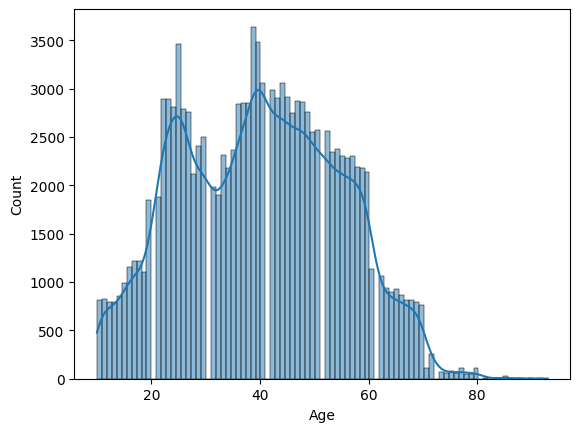

In [72]:
sns.histplot(df['Age'], kde=True)
plt.show()

### Flight Distance

Удалим все дистанции полета со значение больше 4000

In [73]:
df = df.drop(df[df['Flight Distance'] > 4000].index)

Заполним пропущенные значения средним

In [74]:
df['Flight Distance'] = df['Flight Distance'].fillna(df['Flight Distance'].median())

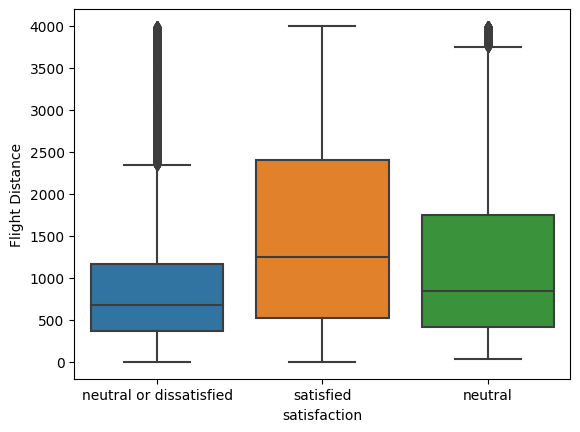

In [75]:
sns.boxplot(x="satisfaction", y="Flight Distance", data=df)
plt.show()

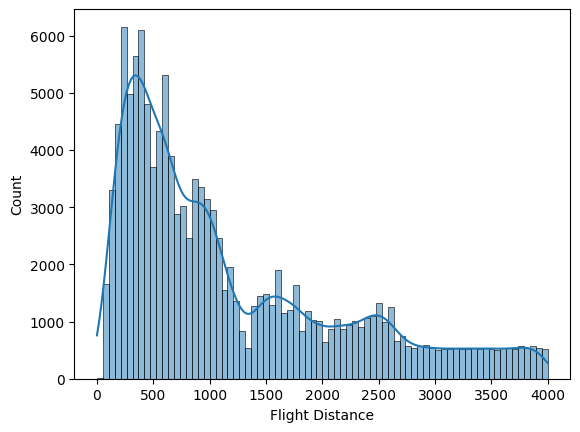

In [76]:
sns.histplot(df['Flight Distance'], kde=True)
plt.show()

###Arrival Delay in Minutes

In [77]:
counts=df['Arrival Delay in Minutes'].value_counts(dropna=False)
print(counts.to_string())

0.0        70578
1.0         2672
2.0         2521
3.0         2388
4.0         2295
5.0         2010
6.0         1969
7.0         1735
8.0         1706
9.0         1518
10.0        1422
11.0        1388
12.0        1312
13.0        1301
14.0        1121
15.0        1020
17.0        1010
16.0        1004
18.0         906
19.0         845
20.0         792
21.0         786
22.0         712
24.0         695
23.0         669
25.0         622
26.0         606
27.0         606
28.0         550
30.0         517
29.0         504
NaN          488
33.0         467
34.0         444
36.0         433
31.0         427
32.0         420
38.0         391
35.0         382
37.0         377
40.0         367
39.0         346
41.0         339
42.0         338
44.0         326
43.0         299
46.0         280
45.0         271
48.0         267
49.0         258
47.0         252
51.0         243
52.0         241
55.0         224
53.0         223
50.0         223
57.0         208
56.0         203
60.0         2

Заменим все значения задержки прибытия больше 30 минут на максимальное выбранное нами значение 30

In [78]:
df['Arrival Delay in Minutes'] = np.where(df['Arrival Delay in Minutes'] > 30, 30 , df['Arrival Delay in Minutes'])

Заполним пропуски медианным значением

In [79]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

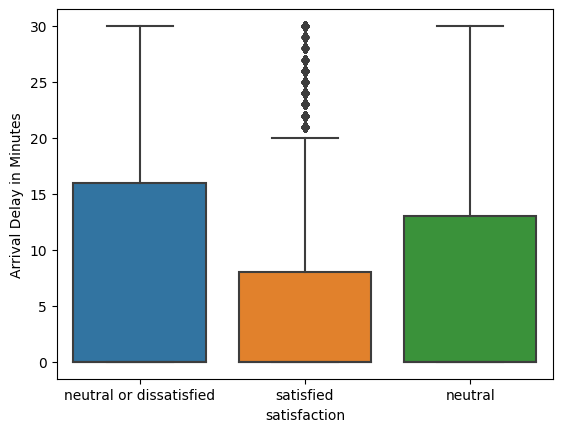

In [80]:
sns.boxplot(x="satisfaction", y="Arrival Delay in Minutes", data=df)
plt.show()

###Departure delay

In [81]:
counts=df['Departure Delay in Minutes'].value_counts()
print(counts.to_string())

0.0        71178
1.0         3545
2.0         2763
3.0         2460
4.0         2231
5.0         2079
6.0         1835
7.0         1697
8.0         1574
9.0         1504
10.0        1411
11.0        1268
12.0        1221
14.0        1152
13.0        1131
15.0        1068
16.0         931
17.0         885
18.0         817
19.0         815
20.0         798
21.0         748
22.0         658
23.0         644
25.0         639
24.0         629
27.0         567
26.0         564
29.0         549
30.0         528
31.0         516
28.0         500
32.0         457
34.0         412
35.0         404
33.0         393
36.0         384
37.0         374
39.0         370
40.0         350
38.0         340
42.0         338
43.0         312
41.0         308
44.0         296
45.0         289
50.0         271
46.0         267
47.0         258
52.0         247
48.0         239
49.0         237
51.0         226
55.0         217
54.0         209
53.0         207
57.0         200
56.0         192
58.0         1

Заменим все значения задержки прибытия больше 30 минут на максимальное выбранное нами значение 30

In [82]:
df['Departure Delay in Minutes'] = np.where(df['Departure Delay in Minutes'] > 30, 30 , df['Departure Delay in Minutes'])

Заполним пропуски медианным значением

In [83]:
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].fillna(df['Departure Delay in Minutes'].median())

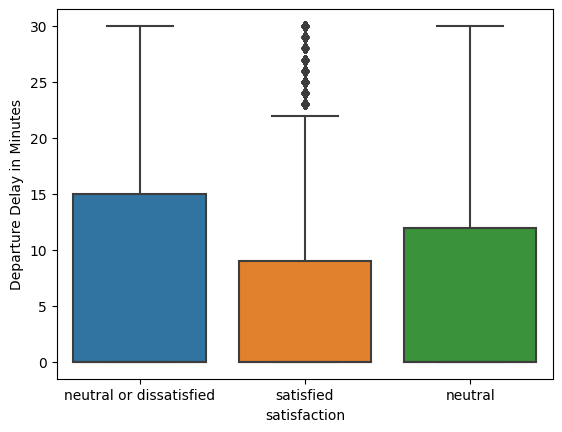

In [84]:
sns.boxplot(x="satisfaction", y="Departure Delay in Minutes", data=df)
plt.show()

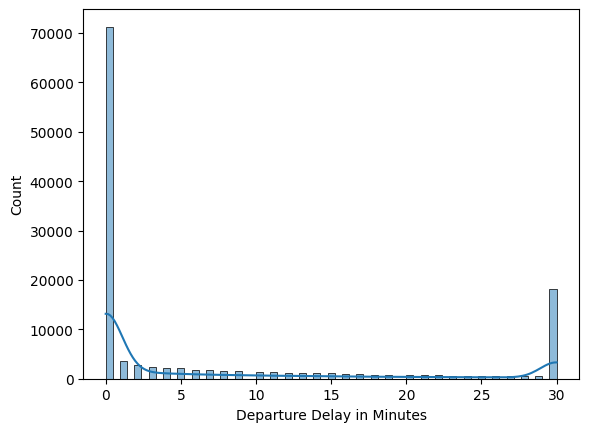

In [85]:
sns.histplot(df['Departure Delay in Minutes'], kde=True)
plt.show()

###Estimation of flight

Столбцы, в которых содержатся значения оценки полета от 0 до 5

In [86]:
labels=['Ease of Online booking','Gate location','Food and drink','Online boarding',\
        'Seat comfort','Inflight entertainment','On-board service','Leg room service',\
        'Baggage handling','Checkin service','Inflight wifi service','Cleanliness', 'Inflight service']

*   Удалим все значения больше 5
*   Удалим пустые значения



In [87]:
for i in labels:
  df=df.drop(df[df[i]>5].index)
  df=df.dropna(subset=[i])
  counts=df[i].value_counts(dropna=False)
  for j in counts.keys():
    if counts[j]<500:
      df=df.drop(df[df[i]==j].index)
  print ('---',i)
  print(counts.to_string())

--- Ease of Online booking
3.0    29417
2.0    29070
4.0    23783
1.0    21220
5.0    17089
0.0     5507
--- Gate location
3.0    34514
4.0    29490
2.0    23568
1.0    21379
5.0    17057
0.0        1
--- Food and drink
4.0    29683
5.0    27190
3.0    26960
2.0    26536
1.0    15432
0.0      130
--- Online boarding
4.0    37494
3.0    26130
5.0    25489
2.0    21015
1.0    12660
0.0     2934
--- Seat comfort
4.0    38645
5.0    32265
3.0    22497
2.0    17806
1.0    14414
0.0        6
--- Inflight entertainment
4.0    35726
5.0    30651
3.0    23007
2.0    21154
1.0    15014
0.0        9
--- On-board service
4.0    37465
5.0    28605
3.0    27457
2.0    17722
1.0    14230
0.0        4
--- Leg room service
4.0    34769
5.0    29861
3.0    24155
2.0    23620
1.0    12400
0.0      589
--- Baggage handling
4.0    45065
5.0    32710
3.0    24864
2.0    13903
1.0     8769
0.0        6
--- Checkin service
4.0    35019
3.0    34133
5.0    25035
2.0    15527
1.0    15512
0.0        5
--- Infli

Пример распределения оценок

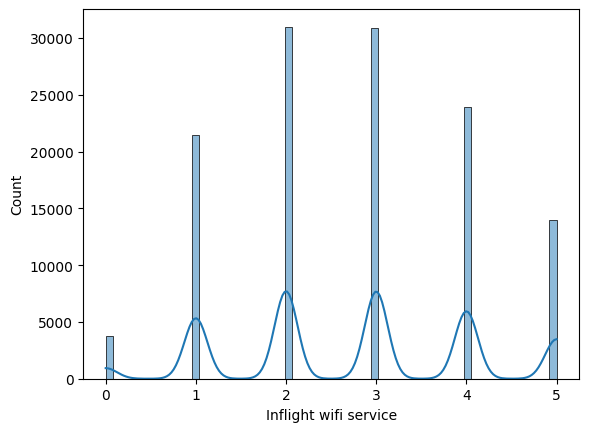

In [88]:
sns.histplot(df['Inflight wifi service'], kde=True)
plt.show()

Проверим количество оставшихся очищенных данных

In [89]:
df.shape

(124975, 24)

#Визуализация зависимостей

Применим label encoding для кодирования значения удолеторенности клиентов

*   0 - neutral or dissatisfied
*   1 - neutral
*   2 - satisfied



In [90]:
label_mapping = {'neutral': 1, 'satisfied': 2, 'neutral or dissatisfied': 0}
df['satisfaction'] = df['satisfaction'].map(label_mapping)

In [91]:
df

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,0
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,30.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,2
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,2
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,2
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,129875,Female,55.0,Loyal Customer,Personal Travel,Eco Plus,308.0,0.0,0.0,3.0,...,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,0
129875,129876,Male,28.0,Loyal Customer,Personal Travel,Eco Plus,447.0,2.0,3.0,4.0,...,4.0,1.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,1
129877,129878,Male,42.0,Loyal Customer,Personal Travel,Eco Plus,337.0,6.0,14.0,2.0,...,2.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,0
129878,129879,Male,50.0,Loyal Customer,Personal Travel,Eco Plus,337.0,30.0,22.0,5.0,...,4.0,4.0,3.0,4.0,5.0,5.0,3.0,4.0,3.0,2


Наиболее довольными оказались постоянные клиенты, практикующие поездки по работе

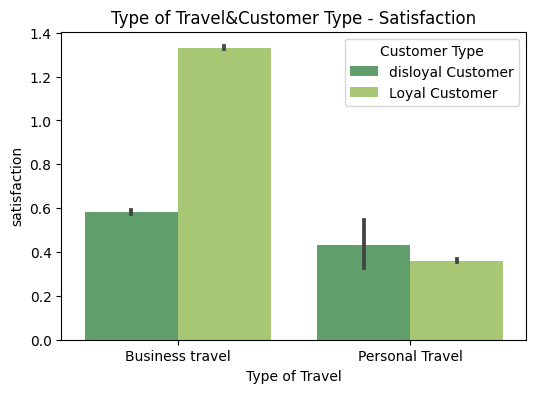

In [92]:
plt.figure(figsize=(6,4))

sns.barplot(x='Type of Travel', y='satisfaction',hue='Customer Type', data = df, palette='summer')
plt.title('Type of Travel&Customer Type - Satisfaction')
plt.show()

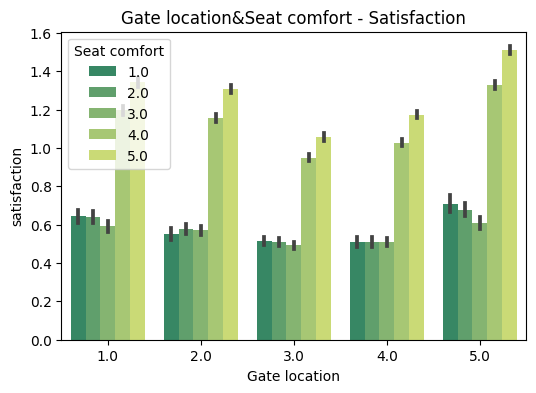

In [93]:
plt.figure(figsize=(6,4))

sns.barplot(x='Gate location', y='satisfaction',hue='Seat comfort', data = df, palette='summer')
plt.title('Gate location&Seat comfort - Satisfaction')
plt.show()

Значительной разницы удовлетворенности различны возрастых групп не обнаружено

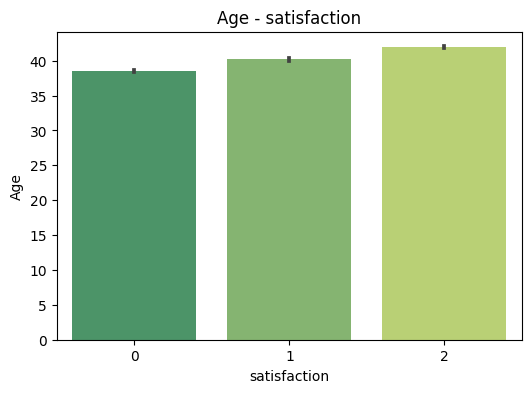

In [94]:
plt.figure(figsize=(6,4))

sns.barplot(x='satisfaction', y='Age', data = df, palette='summer')
plt.title('Age - satisfaction')
plt.show()

**Корреляционная матрица для количественных переменных:**

Наблюдается сильная зависимость между задержкой прибытия и отправления

<Axes: >

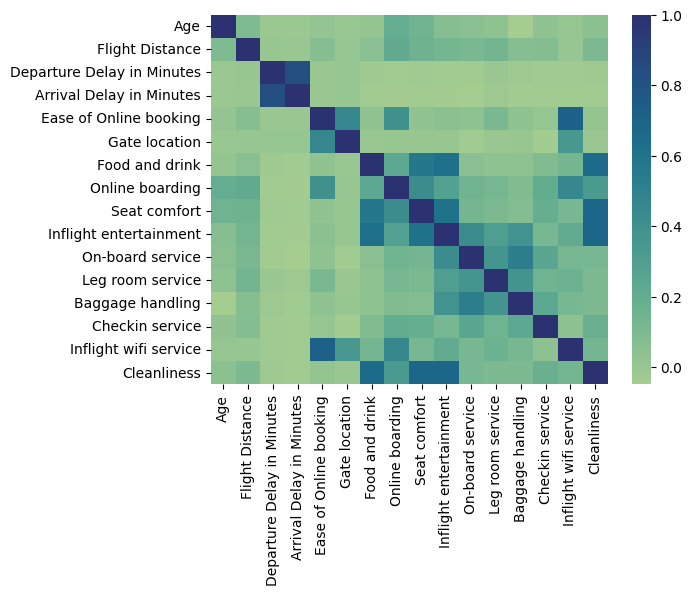

In [95]:
corr = df[['Age','Flight Distance','Departure Delay in Minutes','Arrival Delay in Minutes',\
           'Ease of Online booking','Gate location','Food and drink','Online boarding',\
        'Seat comfort','Inflight entertainment','On-board service','Leg room service',\
           'Baggage handling','Checkin service','Inflight wifi service','Cleanliness']].corr()

sns.heatmap(corr, cmap="crest")

Значительной разницы между удовлетворенность мужчин и женщин не обнаружено

Text(0.5, 1.0, 'Gender-Satisfaction')

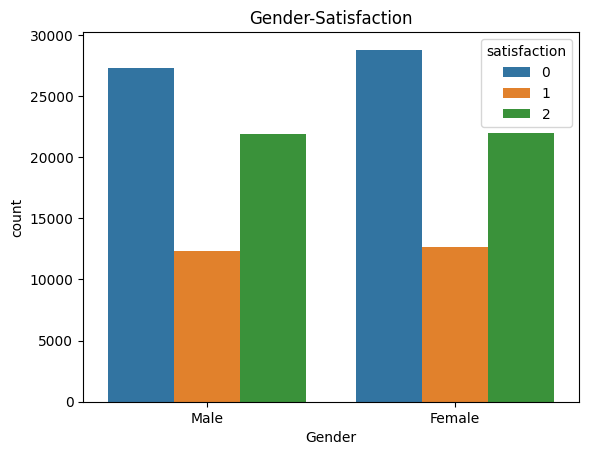

In [96]:
sns.countplot(x='Gender', data = df, hue='satisfaction')
plt.title('Gender-Satisfaction')

Количество довольных клиентов растет с улучшением сервиса на борту, но, по-видимому не является основным влияющим фактором

Text(0.5, 1.0, 'On-board service - Satisfaction')

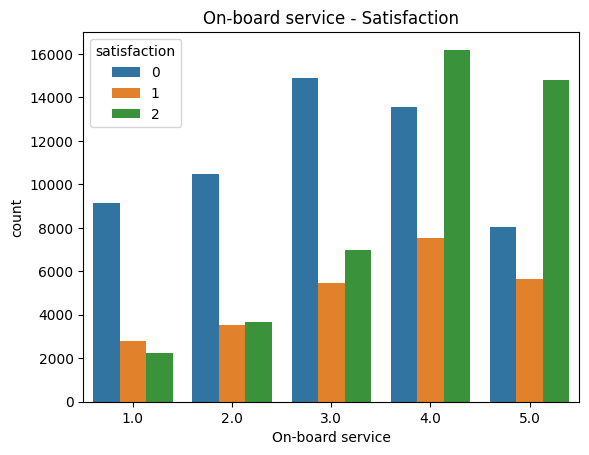

In [97]:
sns.countplot(x='On-board service', data = df, hue='satisfaction')
plt.title('On-board service - Satisfaction')

Количетсво довольных клиентов не зависит от временных задержек

Text(0.5, 1.0, 'Arrival Delay - Satisfaction')

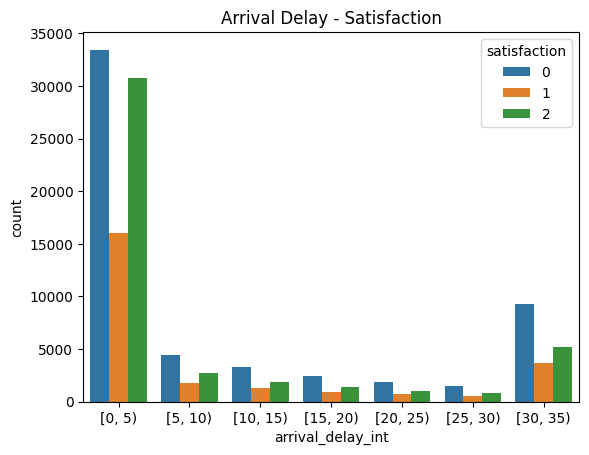

In [98]:
#Разделение задержки прибытия на интервалы
bins=range(0,36,5)
df['arrival_delay_int']=pd.cut(df['Arrival Delay in Minutes'], bins=bins, right=False)

sns.countplot(x='arrival_delay_int', data = df, hue='satisfaction')
plt.title('Arrival Delay - Satisfaction')

Text(0.5, 1.0, 'Depature Delay - Satisfaction')

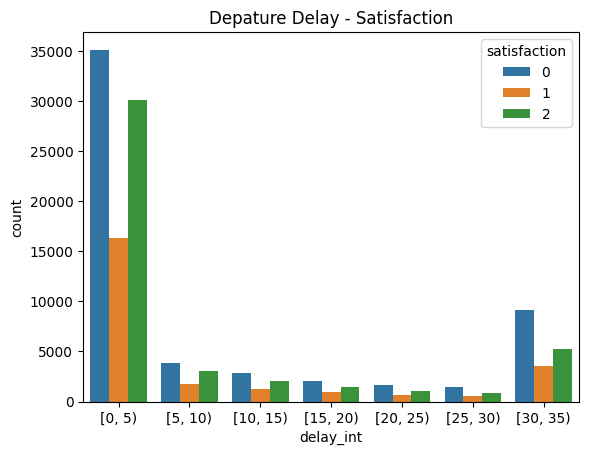

In [99]:
#Раазделение задержки отпралвения на интервалы
bins=range(0,36,5)
df['delay_int']=pd.cut(df['Departure Delay in Minutes'], bins=bins, right=False)

sns.countplot(x='delay_int', data = df, hue='satisfaction')
plt.title('Depature Delay - Satisfaction')

##Сохранение готового очищенного датасета

In [100]:
df.drop(columns=['delay_int','arrival_delay_int'])

,id,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Inflight wifi service,...,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction
0,1,Male,48.0,disloyal Customer,Business travel,Business,821.0,2.0,5.0,3.0,...,3.0,5.0,5.0,3.0,2.0,5.0,4.0,5.0,5.0,0
1,2,Female,35.0,Loyal Customer,Business travel,Business,821.0,26.0,30.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,2
2,3,Male,41.0,Loyal Customer,Business travel,Business,853.0,0.0,0.0,4.0,...,5.0,5.0,3.0,3.0,3.0,3.0,4.0,3.0,5.0,2
3,4,Male,50.0,Loyal Customer,Business travel,Business,1905.0,0.0,0.0,2.0,...,4.0,5.0,5.0,5.0,5.0,5.0,3.0,5.0,4.0,2
4,5,Female,49.0,Loyal Customer,Business travel,Business,3470.0,0.0,1.0,3.0,...,5.0,4.0,3.0,3.0,4.0,3.0,3.0,3.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,129875,Female,55.0,Loyal Customer,Personal Travel,Eco Plus,308.0,0.0,0.0,3.0,...,4.0,3.0,4.0,4.0,3.0,4.0,4.0,4.0,4.0,0
129875,129876,Male,28.0,Loyal Customer,Personal Travel,Eco Plus,447.0,2.0,3.0,4.0,...,4.0,1.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,1
129877,129878,Male,42.0,Loyal Customer,Personal Travel,Eco Plus,337.0,6.0,14.0,2.0,...,2.0,3.0,3.0,3.0,4.0,5.0,4.0,4.0,3.0,0
129878,129879,Male,50.0,Loyal Customer,Personal Travel,Eco Plus,337.0,30.0,22.0,5.0,...,4.0,4.0,3.0,4.0,5.0,5.0,3.0,4.0,3.0,2


In [101]:
df.to_csv("clients_clean.csv", index=False)